In [3]:
%pylab inline
%load_ext autoreload
%autoreload 2


Populating the interactive namespace from numpy and matplotlib


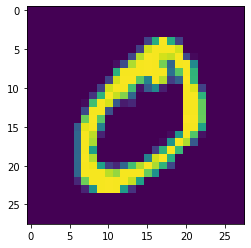

In [5]:
import numpy as np
import gzip
parse = lambda file: np.frombuffer(gzip.open(file).read(), dtype=np.uint8).copy()
X_train = parse("data/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_train = parse("data/train-labels-idx1-ubyte.gz")[8:]

imshow(X_train[1])

NameError: name 'tensor' is not defined

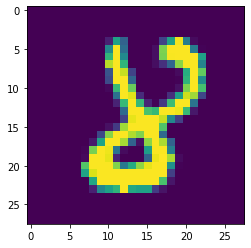

In [48]:
import torch
from gan import Generator, Discriminator 

generator = Generator()
discriminator = Discriminator()

batch_size = 4

samp = np.random.randint(0, X_train.shape[0], size=(batch_size))
x = X_train[samp].reshape(-1, 28*28).astype(np.float32)/255.
imshow(x[0].reshape(-1, 28))
x = (x - 0.5)/0.5
x = torch.tensor(x)

y = np.zeros((batch_size,2), dtype=np.float32)
y[:,1] = -2
y = torch.tensor(y)


noise = torch.tensor(np.random.rand(batch_size, 128)).float()
#imshow(noise)
fake_data = generator(noise).detach()
print(fake_data.shape)

print(x.shape)
real_out = discriminator(x)
print(real_out)

real_loss = (real_out * y).mean()

ImportError: cannot import name 'real_label' from 'gan' (/home/brucewayne/fun/mnist-notebooks/gan.py)